# Investigate the Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Importing the necessary packages</a></li> 
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
      <li> <a href="#pro">General Properties of the Dataset</a></li>
      <li> <a href="#dup">Data Cleaning - Drop duplicated rows </a></li>
      <li> <a href="#null">Data Cleaning - Solving 0 Values</a></li>
      <li> <a href="#drop">Data Cleaning - Drop columns</a></li>
      <li> <a href="#data">Data Cleaning - Change Data Type</a></li>
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a>
    <ul>
       <li> <a href="#cen"> Movies numbers trend over two centuries</a></li>
      <li> <a href="#pop"> Analysing Movie Popularity Trend over Years</a></li>
      <li> <a href="#rat"> Analysing Rating</a></li>
      <li> <a href="#gen">Analysing Genres</a></li>
    </ul>

</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,500 movies collected from The Movie Database (TMDb), including user ratings ratings, revenue, runtime and budget.

In this project, I will be answering the following questions:
<ul>
<li>Analyse trend over the years and over two centuries in terms of the number of movies produced</li>
<li>Movie popularity Trend over the years</li>
<li>Analysing Rating Average</li>
<li>Relationship between release year and vote average</li>
<li>What are the 25 most rated movies?</li>
<li>Top 25 popular/high rating data filtered by years</li>
<li>The relationship between runtime and vote average?</li>
<li>Analysing Genres by defining the 3 most/least commen genres  </li>
</ul>

<a id='import'></a>
## Importing the necessary packages

In [1]:
# Import all the necessary packages  to import the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

<a id='pro'></a>
### General Properties of the Dataset

In [2]:
# Load movies' data frame
movies_df = pd.read_csv('tmdb-movies.csv')    

# Returns a tuple of the dimensions of the movies dataframe 
print(movies_df.shape)  

# Print out a few lines to see how the dataset looks like
movies_df.head(2)          

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
 # Return the datatypes of the columns
movies_df.dtypes            

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
# Find out how many duplicate rows in the dataset
movies_df.duplicated().sum()  

1

In [5]:
# Find out how many missing values
movies_df.isnull().sum()     

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Returns the number of unique values in each column
movies_df.nunique()         

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# Grouped by Title, To find how many duplicated movies Title are in the dataset
movies_df.groupby('original_title').size().sort_values(ascending=False)[:25] 

original_title
Hamlet                  4
Hercules                3
Shelter                 3
Emma                    3
Wuthering Heights       3
Beauty and the Beast    3
Jane Eyre               3
Life                    3
Alice in Wonderland     3
Oliver Twist            3
Frankenstein            3
The Black Hole          3
Annie                   3
A Christmas Carol       3
The Three Musketeers    3
Julia                   3
Carrie                  3
Spartacus               2
Anna Karenina           2
Crossroads              2
Twilight                2
The Great Gatsby        2
Unknown                 2
Fright Night            2
Game of Death           2
dtype: int64

In [8]:
# Return useful descriptive statistics for each column of data frame
movies_df.describe()  

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# Total number of records with zero budget
(movies_df['budget']== 0).sum() 

5696

In [10]:
# Total number of revenue with zero budget
(movies_df['revenue']== 0).sum() 

6016

In [11]:
# Total number of runtime with zero budget
(movies_df['runtime']== 0).sum()  

31

In [12]:
# Return a list of the columns' labels
movies_df.columns   

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<a id='dup'></a>
### Data Cleaning - Drop duplicated rows

In [13]:
# Drop duplicated rows
movies_df.drop_duplicates(inplace = True) 

# Confirm correction by rechecking for duplicates in the data
sum(movies_df.duplicated())                    

0

In [14]:
# Return a tuple of the dimensions of the movies dataframe after dropping the duplication
movies_df.shape     # Return a tuple of the dimensions of the movies dataframe after dropping the duplication          

(10865, 21)

<a id='null'></a>
### Data Cleaning - Solving 0 Values

In [15]:
# Get average of runtime
print(movies_df['runtime'].mean())  

102.07179015186378


In [16]:
# Replace 0 values with mean
movies_df['runtime'] = movies_df['runtime'].replace(0, 102.07) 

 # Cofirm the chages 
movies_df.describe()                  

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.363016,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,30.904043,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='drop'></a>
### Data Cleaning - Drop  extraneous columns

In [17]:
# Drop extraneous columns
movies_df.drop(['imdb_id','budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)  

# Confirm changes
movies_df.head(1)        

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [18]:
# Create a new list to reorder the columns in movies dataframe
new_cols = ['id','original_title','release_date','release_year','popularity','runtime','vote_average','vote_count','genres']

movies_df= movies_df[new_cols] 

# confirm changes
movies_df.head()         

,id,original_title,release_date,release_year,popularity,runtime,vote_average,vote_count,genres
0,135397,Jurassic World,6/9/15,2015,32.985763,124.0,6.5,5562,Action|Adventure|Science Fiction|Thriller
1,76341,Mad Max: Fury Road,5/13/15,2015,28.419936,120.0,7.1,6185,Action|Adventure|Science Fiction|Thriller
2,262500,Insurgent,3/18/15,2015,13.112507,119.0,6.3,2480,Adventure|Science Fiction|Thriller
3,140607,Star Wars: The Force Awakens,12/15/15,2015,11.173104,136.0,7.5,5292,Action|Adventure|Science Fiction|Fantasy
4,168259,Furious 7,4/1/15,2015,9.335014,137.0,7.3,2947,Action|Crime|Thriller


<a id='data'></a>
### Data Cleaning - Change Data Type

In [19]:
# Change the data type of release date from Integar to date format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date']) 

# Confirm changes
movies_df.dtypes 

id                         int64
original_title            object
release_date      datetime64[ns]
release_year               int64
popularity               float64
runtime                  float64
vote_average             float64
vote_count                 int64
genres                    object
dtype: object

In [20]:
# Make a copy of the dataframe after cleaning the data
movies_df_clean = movies_df.copy() 

# Print out a few lines to Confirm changes
movies_df_clean.head(2)

,id,original_title,release_date,release_year,popularity,runtime,vote_average,vote_count,genres
0,135397,Jurassic World,2015-06-09,2015,32.985763,124.0,6.5,5562,Action|Adventure|Science Fiction|Thriller
1,76341,Mad Max: Fury Road,2015-05-13,2015,28.419936,120.0,7.1,6185,Action|Adventure|Science Fiction|Thriller


<a id='eda'></a>
## Exploratory Data Analysis

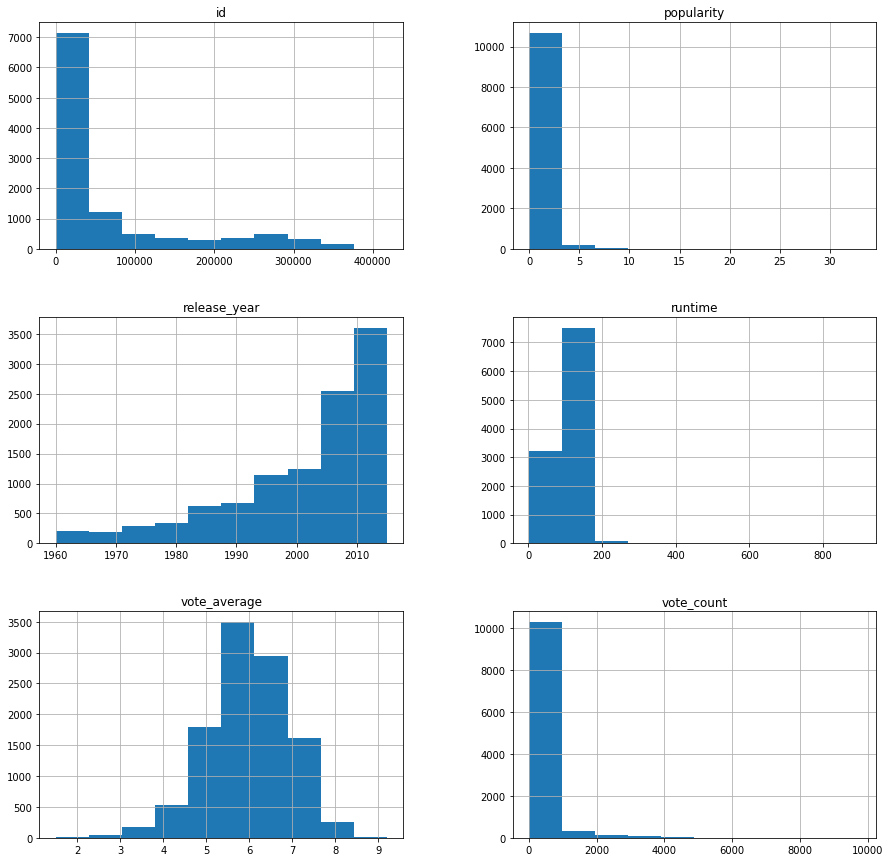

In [21]:
# Explore how the histogram of all numerical data look like!!
movies_df_clean.hist(figsize=(15,15));   

<a id='cen'></a>
### Movies numbers trend over two centuries

In [22]:
# Split the dataset into 2 dataframes: the first one represents the movies produced last century and the other for those produced on this century

# Select the movies produced last century
century_20 = movies_df_clean[movies_df_clean['release_year']< 2000]  

 # Select the movies produced in 2000 and above
century_21 = movies_df_clean[movies_df_clean['release_year']>= 2000]        

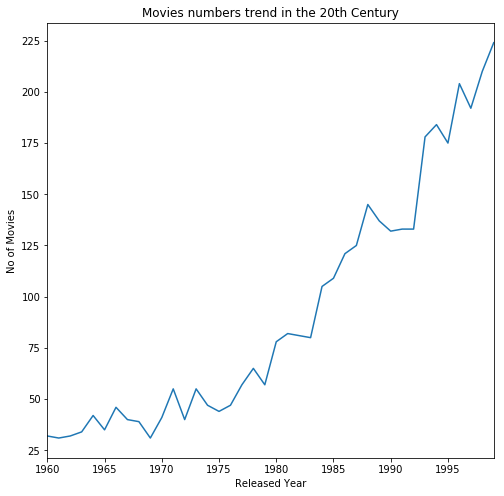

In [23]:
# Select the total number of movies grouped by year for 20s century, and show the result in a line plot
century_20.groupby('release_year').count().original_title.plot(kind='line',figsize=(8,8))
plt.xlabel('Released Year')
plt.ylabel('No of Movies')
plt.title('Movies numbers trend in the 20th Century');


> We can see from the above line plot that movies numbers trend was rising every year in the last century. The minimum is in 1960 and 1968. In 1980 the movies numbers starts to increase. That is due to satallite and then Inernet techjnology, that affects also the increasing of the movies numbers by the end of last century, Which is still ongoing.

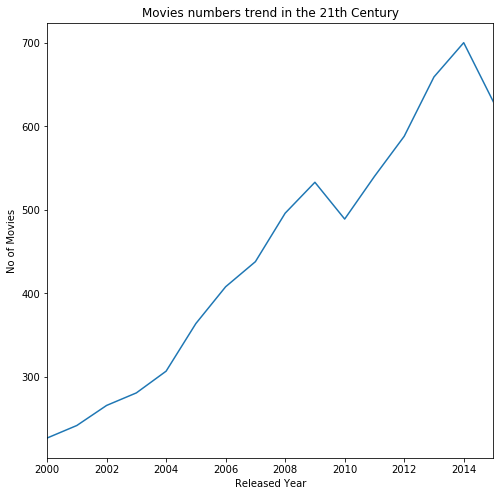

In [24]:
#Select the total number of movies grouped by year for twenty first century, and  show the result in a line plot
century_21.groupby('release_year').count().original_title.plot(kind='line',figsize=(8,8))
plt.xlabel('Released Year')
plt.ylabel('No of Movies')
plt.title('Movies numbers trend in the 21th Century');

> In this century, there is very strong increase in the number of movies produced. In 2010 there is obvious declined, then the number increased pointedly. This increase is due to the advanced filmmaking technology, which makes the film industry easier and faster. 

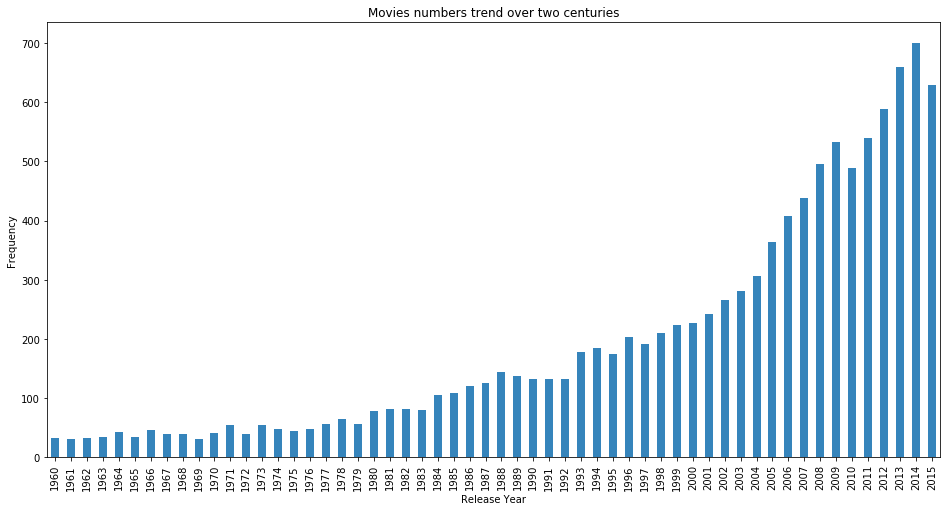

In [25]:
# create a bar chart for the total number of movies grouped by year

movies_df_clean.groupby('release_year').count().original_title.plot(kind='bar', alpha=0.9,figsize=(16,8))
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Movies numbers trend over two centuries');

In [26]:
# Select the movies produced last century
century_20_sum = century_20.count().original_title

# Select the movies produced since 2000 and above
century_21_sum = century_21.count().original_title 

print("Total nummber of movies in 20 century are: " + str(century_20_sum))
print("Total nummber of movies in 21 century are: " + str(century_21_sum))

Total nummber of movies in 20 century are: 3698
Total nummber of movies in 21 century are: 7167


<a id='pop'></a>
### Movie Popularity trend over the years

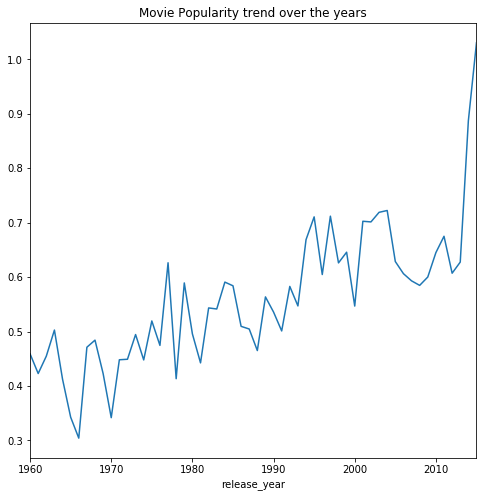

In [27]:
# Create a line chart for the movie Popularity trend over the years
movies_df_clean.groupby('release_year').popularity.mean().plot(kind='line',figsize=(8,8))
plt.title('Movie Popularity trend over the years');

> We can see from the above line plot that the trend of popularity mean is rising every year. The minimum is in 1965 and the peak is in 2015. On average, movies popularity over years is going up in recent years. The trend is reasonable due to the easily access of movie information nowadays. In the Internet age, people can easily search and gather movie information, visit various movie introduction pages, rate movies, even watching the content through different sources. This is probably what affects how popular a movie can be. 

<a id='rat'></a>
### Analysing Rating

#### Relationship between release year and vote average

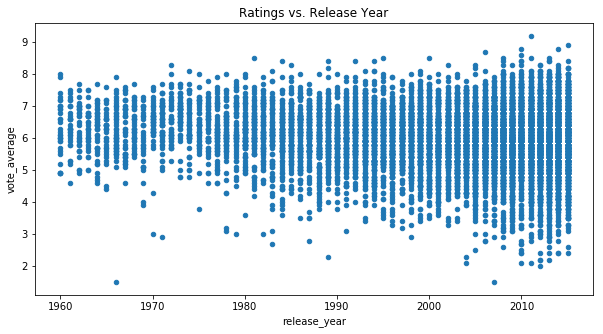

In [28]:
# Create a scatter plot of release year column and vote average column

movies_df_clean.plot(x = 'release_year', y = 'vote_average',kind='scatter',figsize=(10,5))  # NOT SURE 
plt.title('Ratings vs. Release Year');

> During the 1960s technology was not as advanced as it is right now. At that time, the only way to rate a movies was using paper. The increase of rating average started in the 1980s which is also reasonable, due to the beginnning of the advanced technology making it easier to rate  movies.

#### The Movies Vote level 

In [29]:
# View the min, 25%, 50%, 75%, max vote_average values with Pandas describe
movies_df_clean.describe().vote_average

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [30]:
# Bin edges that will be used to "cut" the data into 4 group
bin_edges = [1.5, 5.4, 6.0, 6.6, 9.2]  # Fill in this list with five values you just found: Min, 25%, 50%, 75% and Max    

In [31]:
# Labels for the four Vote level groups  
bin_names = ['poor', 'low', 'Medium', 'high']  # Name each Vote level category

In [32]:
# Creates Vote levels column 
movies_df_clean['vote_level'] = pd.cut(movies_df_clean['vote_average'], bin_edges, labels=bin_names) 

In [33]:
# Checks for successful creation of this column
movies_df_clean.head(2)

,id,original_title,release_date,release_year,popularity,runtime,vote_average,vote_count,genres,vote_level
0,135397,Jurassic World,2015-06-09,2015,32.985763,124.0,6.5,5562,Action|Adventure|Science Fiction|Thriller,Medium
1,76341,Mad Max: Fury Road,2015-05-13,2015,28.419936,120.0,7.1,6185,Action|Adventure|Science Fiction|Thriller,high


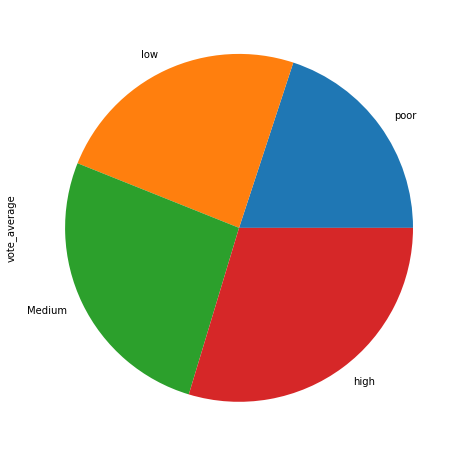

In [34]:
# Create a pie plot for the four Vote level groups   
movies_df_clean.groupby('vote_level').vote_average.mean().plot(kind='pie',figsize=(8,8));

> We can see from this pie chart, that most movies have either high or medium vote averge. I think the production companied meet the audience wishes, with producing differt movies genres among various ages.

In [35]:
# Create a new dataframe for the movies with vote_level column
movies_df_vote_level = movies_df_clean.copy()

# Check the changes
movies_df_vote_level.head(1)

,id,original_title,release_date,release_year,popularity,runtime,vote_average,vote_count,genres,vote_level
0,135397,Jurassic World,2015-06-09,2015,32.985763,124.0,6.5,5562,Action|Adventure|Science Fiction|Thriller,Medium


 ####  The 25 best rated movies?

In [36]:
# Select Top 25 rated movies. 
top_25=movies_df_vote_level.nlargest(25, 'vote_average') 

# Print the result out
top_25

,id,original_title,release_date,release_year,popularity,runtime,vote_average,vote_count,genres,vote_level
3894,125336,The Story of Film: An Odyssey,2011-09-03,2011,0.006925,900.0,9.2,14,Documentary,high
538,224972,The Mask You Live In,2015-01-01,2015,0.114264,88.0,8.9,11,Documentary,high
1200,374430,Black Mirror: White Christmas,2014-12-16,2014,0.129531,74.0,8.8,41,Drama|Horror|Mystery|Science Fiction|Thriller,high
2269,51299,Life Cycles,2010-10-02,2010,0.222293,47.0,8.8,27,Documentary,high
6911,24970,Pink Floyd: Pulse,2006-07-09,2006,0.212010,145.0,8.7,23,Music,high
2401,45644,Opeth: In Live Concert At The Royal Albert Hall,2010-09-21,2010,0.067753,163.0,8.6,10,Music,high
3224,20313,John Mayer: Where the Light Is Live in Los Ang...,2008-07-01,2008,0.224721,164.0,8.5,16,Music,high
3690,68450,The Art of Flight,2011-09-08,2011,0.321341,80.0,8.5,60,Adventure|Documentary,high
5830,282848,Doctor Who: The Time of the Doctor,2013-12-25,2013,0.248944,60.0,8.5,26,NaN,high
8221,55676,A Personal Journey with Martin Scorsese Throug...,1995-05-21,1995,0.194889,225.0,8.5,11,Documentary,high


#### The best 25 rated movies I filtered by years.

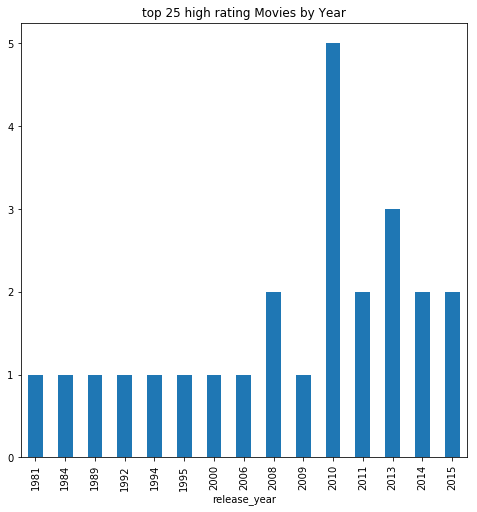

In [37]:
# Group by year and choose the top 25 high and present the result in a bar plot
top_25.groupby('release_year').count().original_title.plot(kind='bar',figsize=(8,8))
plt.title('top 25 high rating Movies by Year');


> This bar plot indicates that 2010 is the best year in case of movies quality, inspite of there is a decline in the number os movies produced as showen before. 20% from the best 25 rated movies filtered by years is in 2010. Then comes 2018

####  The relationship between runtime and vote average?

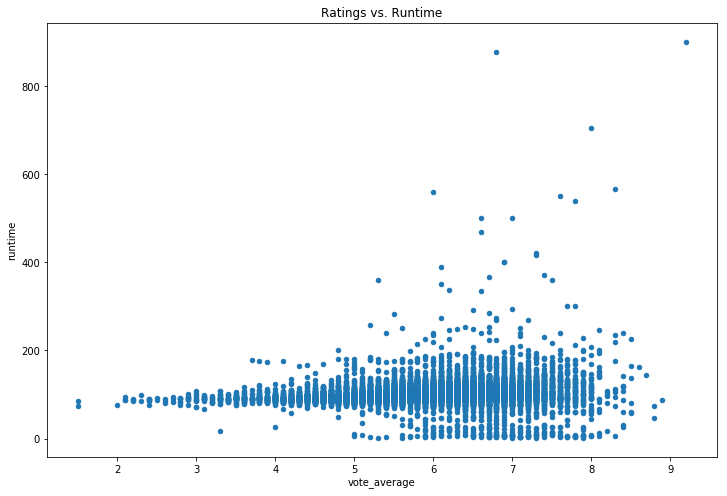

In [38]:
# Plot scatter plot of runtime column and vote average column
movies_df_vote_level.plot(x = 'vote_average', y = 'runtime',kind='scatter',figsize=(12,8))
plt.title('Ratings vs. Runtime');

> From this scatter plot, we can draw several conclusions:
Short films are likely to have a mid-to-high rating. Movies with a runtime around 100 minutes tend to have an unpredictable rating, as they can run from low to high. Films/shows with a runtime above or below 100 minues tend to have mid-to-high ratings. Tv series and movies with long runtime consistently get higher-than-average
ratings

In [39]:
# Select the top 10 movies based on runtime
top_runtime = movies_df_vote_level.nlargest(10, 'runtime')

# Show the result
top_runtime

,id,original_title,release_date,release_year,popularity,runtime,vote_average,vote_count,genres,vote_level
3894,125336,The Story of Film: An Odyssey,2011-09-03,2011,0.006925,900.0,9.2,14,Documentary,high
4041,150004,Taken,2002-12-02,2002,0.469332,877.0,6.8,38,Science Fiction,high
2722,331214,Band of Brothers,2001-09-09,2001,0.537593,705.0,8.0,313,Action|Drama|War,high
6176,42044,Shoah,1985-11-01,1985,0.147489,566.0,8.3,16,Documentary,high
6181,18729,"North and South, Book I",1985-11-03,1985,0.000065,561.0,6.0,17,Drama|History|Western,low
6894,192040,Planet Earth,2006-12-10,2006,0.137913,550.0,7.6,65,Documentary,high
2214,189197,The Pacific,2010-05-16,2010,0.757082,540.0,7.8,183,War|Drama|Action|Adventure|History,high
3356,118309,John Adams,2008-03-16,2008,0.136540,501.0,6.6,33,History|Drama,Medium
1865,220903,Life,2009-12-14,2009,0.102223,500.0,7.0,24,Documentary,high
3141,54102,Generation Kill,2008-07-13,2008,0.336308,470.0,6.6,28,Drama|War|History,Medium


In [40]:
# Select the top 10 movies based on vote average
top_vote_average= movies_df_clean.nlargest(10, 'vote_average')

# Show the result
top_vote_average

,id,original_title,release_date,release_year,popularity,runtime,vote_average,vote_count,genres,vote_level
3894,125336,The Story of Film: An Odyssey,2011-09-03,2011,0.006925,900.0,9.2,14,Documentary,high
538,224972,The Mask You Live In,2015-01-01,2015,0.114264,88.0,8.9,11,Documentary,high
1200,374430,Black Mirror: White Christmas,2014-12-16,2014,0.129531,74.0,8.8,41,Drama|Horror|Mystery|Science Fiction|Thriller,high
2269,51299,Life Cycles,2010-10-02,2010,0.222293,47.0,8.8,27,Documentary,high
6911,24970,Pink Floyd: Pulse,2006-07-09,2006,0.212010,145.0,8.7,23,Music,high
2401,45644,Opeth: In Live Concert At The Royal Albert Hall,2010-09-21,2010,0.067753,163.0,8.6,10,Music,high
3224,20313,John Mayer: Where the Light Is Live in Los Ang...,2008-07-01,2008,0.224721,164.0,8.5,16,Music,high
3690,68450,The Art of Flight,2011-09-08,2011,0.321341,80.0,8.5,60,Adventure|Documentary,high
5830,282848,Doctor Who: The Time of the Doctor,2013-12-25,2013,0.248944,60.0,8.5,26,NaN,high
8221,55676,A Personal Journey with Martin Scorsese Throug...,1995-05-21,1995,0.194889,225.0,8.5,11,Documentary,high


<a id='gen'></a>
### Analysing Genres

In [41]:
# Find out how many null values in genres column
movies_df_clean['genres'].isnull().sum() 

23

In [42]:
# replace any empty strings in the genres column with np.nan objects
movies_df_clean['genres'].replace('', np.nan, inplace=True) 

# Remove Null values from genres column
movies_df_clean.dropna(subset=['genres'], inplace=True) 

In [43]:
# Make a copy of the dataframe after remove Null values from genres column
movies_df_genres =movies_df_clean.copy()  

In [44]:
# Split the genres column by the "|" character and make each genre in a new column
genres_split = movies_df_genres["genres"].str.split("|", n = 10, expand = True) 

# Print the result out
genres_split.head() 

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [45]:
# Rename the new columns
genres_split.columns =['genre1', 'genre2', 'genre3', 'genre4', 'genre5']

In [46]:
# Drop original genres column from movies_df_genres dataset
movies_df_genres.drop('genres', axis=1, inplace=True) 

In [47]:
# Merge the 4 splitted genres column into the movies_df_genres 
movies_df_genres["genre2"]= genres_split["genre2"] 
movies_df_genres["genre1"]= genres_split["genre1"] 
movies_df_genres["genre3"]= genres_split["genre3"] 
movies_df_genres["genre4"]= genres_split["genre4"] 
movies_df_genres["genre5"]= genres_split["genre5"] 

# Check the result out
movies_df_genres.head()

,id,original_title,release_date,release_year,popularity,runtime,vote_average,vote_count,vote_level,genre2,genre1,genre3,genre4,genre5
0,135397,Jurassic World,2015-06-09,2015,32.985763,124.0,6.5,5562,Medium,Adventure,Action,Science Fiction,Thriller,None
1,76341,Mad Max: Fury Road,2015-05-13,2015,28.419936,120.0,7.1,6185,high,Adventure,Action,Science Fiction,Thriller,None
2,262500,Insurgent,2015-03-18,2015,13.112507,119.0,6.3,2480,Medium,Science Fiction,Adventure,Thriller,None,None
3,140607,Star Wars: The Force Awakens,2015-12-15,2015,11.173104,136.0,7.5,5292,high,Adventure,Action,Science Fiction,Fantasy,None
4,168259,Furious 7,2015-04-01,2015,9.335014,137.0,7.3,2947,high,Crime,Action,Thriller,None,None


In [48]:
# Make a new copy of the data frame after spliting the genres
movies_df_genres_clean = movies_df_genres.copy()

In [49]:
# Drop all unnecessary columns
movies_df_genres_clean.drop(['id','original_title' ,'release_date', 'release_year','popularity','runtime','vote_average','vote_count', 'vote_level'], axis=1, inplace=True)

...
Pandas.melt() is one of the function to do so.. ... melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value
https://www.geeksforgeeks.org/python-pandas-melt/
...

In [56]:
movies_genres = movies_df_genres_clean.melt()

In [51]:
#  Use crosstab to group the genres, and assign it to a new df.
movies_genres_1 = pd.crosstab(index=movies_genres['value'], columns=movies_genres['variable'])
movies_genres_1 

variable,genre1,genre2,genre3,genre4,genre5
value,,,,,
Action,1590,544,198,42,10
Adventure,586,626,183,62,14
Animation,403,207,80,6,3
Comedy,2319,990,388,81,15
Crime,380,449,350,152,23
Documentary,432,77,8,3,0
Drama,2453,1618,546,124,19
Family,144,448,401,178,60
Fantasy,272,304,190,109,41


In [52]:
# Create a column to calculate the totals for each genre title
movies_genres_1['totals'] = movies_genres_1['genre1'] + movies_genres_1['genre2'] + movies_genres_1['genre3'] + movies_genres_1['genre4'] + movies_genres_1['genre5']

# Check the result out
movies_genres_1.head()

variable,genre1,genre2,genre3,genre4,genre5,totals
value,,,,,,
Action,1590,544,198,42,10,2384
Adventure,586,626,183,62,14,1471
Animation,403,207,80,6,3,699
Comedy,2319,990,388,81,15,3793
Crime,380,449,350,152,23,1354


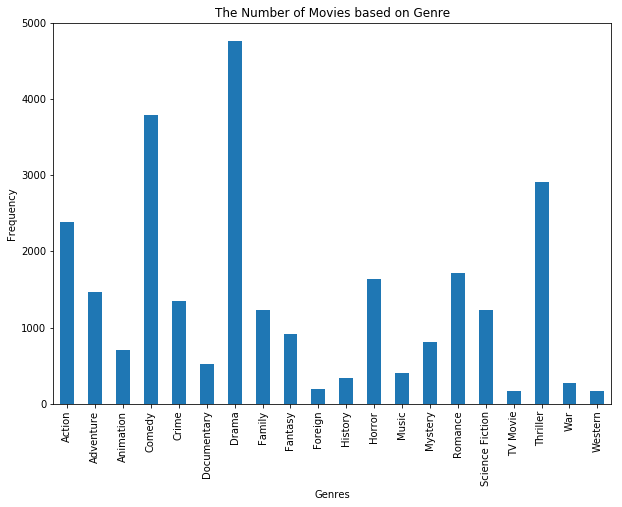

In [53]:
# Plot a bar plot with the Number of Movies based on Genre
movies_genres_1['totals'].plot(kind="bar", figsize=(10,7)) # Plot in a bar chart
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('The Number of Movies based on Genre');

> This bar chart shows that the 3 most commen genre are Drama, Comedy and Thriller. While the 3 least movie genre are TV Movie, Western and Foreign.

<a id='conclusions'></a>
## Conclusion

> This data set contains information about movies collected from The Movie Database (TMDb), including user ratings ratings, revenue, runtime and budget.

> After diving deep in the data, I found that the data set has 10688 records, with 10571 unique Movie titles. First I focused on the Budget and Revenue. I thought that would be an interseting and important part to analyse. However, I found out that about 52% of the records missing  Budget value, while about 55% are missing Revenue value. 

> This limitation of the database is due to missing a huge amount of important values.  It is not logical or even accurate to fill these missing values with Average, delete them or to even anlayse. In these Scenarios, this  will lead either to wrong analysis which will lead to wrong predictions or biased analysis. 
If these values are availabe in the dataframe, a lot of analysis would be done. For example: Compare the budget and the revenue, pull out the top 10 revenue earning movies, What genres are associated with movies that have high revenues? Explore what month(s) have the highest revenues etc..

> The conclusion after the analysing:

> There is a strong increase in the number of movies produced, escpeically in the 1980s.That is due to satallite and the Inernet technology, that also affects the increase of the amount of movies by the end of last century and this century. This increase is due to the advanced filmmaking technology, which makes the film industry easier and faster. However, there is a slight decline in 2015 in comparision with the pick 2014. Inspite of there is a decline in the number os movies produced in 2015. I found it interesting that 20% of the best 25 rated movies filtered by years are in 2010. That concludes that the quality is more important than quantity.

> On average, in recent years popularity in movies has been increasing. The trend is reasonable due to easily access of movie information nowadays. In the Internet age, people can easily search and gather movie information, visit various movie introduction pages, rate movies, even watching the content through different sources. This is probably what affects how popular a movie can be.

> The relationship between runtime and vote average?: Short films are likely to have a mid-to-high rating. Movies with a runtime around 100 minutes tend to have an unpredictable rating, as they can run from low to high. Films/shows with a runtime above or below 100 minues tend to have mid-to-high ratings. Tv series and movies with long runtime consistently get higher-than-average ratings. 

> Relationship between release year and vote average: During the 1960s technology was not as advanced as it is right now. At that time, the only way to rate a movies was using paper. The increase of rating average started in the 1980s which is also reasonable, due to the beginnning of the advanced technology making it easier to rate movies.

> Finally, when I analysed the genre, I noticed that only of the highet earning genres is in the top 3 most frequently produced genres: Drama, Comedy and Thriller. 

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_Movies_Dataset_Alkallas.ipynb'])

0